### INSTALL PACKAGES

In [14]:
!pip install top2vec

### IMPORT PACKAGES

In [15]:
from top2vec import Top2Vec
from os import listdir
from os.path import isfile, join
import umap
import umap.plot
import matplotlib.pyplot as plt

### LOAD FILES

In [4]:
def load_files():

    corpus_dict = {"volume": [],
                   "title":[],
                   "text":[]}

    for i in range(1, 13):
        path = f"Volume_{i + 1}"
        files = [f for f in listdir(path) if isfile(join(path, f))]

        for file in files:
            with open(path + "/" + file, 'r', encoding='utf-8') as f:
                content = f.read()
                corpus_dict['volume'].append(i)
                corpus_dict['title'].append(file[:-4])
                corpus_dict['text'].append(content)

    return corpus_dict   

corpus_dict = load_files()

### PARAMETERS 

In [17]:
print(Top2Vec.__doc__)


    Top2Vec

    Creates jointly embedded topic, document and word vectors.


    Parameters
    ----------
    documents: List of str
        Input corpus, should be a list of strings.

    min_count: int (Optional, default 50)
        Ignores all words with total frequency lower than this. For smaller
        corpora a smaller min_count will be necessary.

    topic_merge_delta: float (default 0.1)
        Merges topic vectors which have a cosine distance smaller than
        topic_merge_delta using dbscan. The epsilon parameter of dbscan is
        set to the topic_merge_delta.

    ngram_vocab: bool (Optional, default False)
        Add phrases to topic descriptions.

        Uses gensim phrases to find common phrases in the corpus and adds them
        to the vocabulary.

        For more information visit:
        https://radimrehurek.com/gensim/models/phrases.html

    ngram_vocab_args: dict (Optional, default None)
        Pass custom arguments to gensim phrases.

        For 

### CREATE  TOP2VEC MODEL

In [6]:
top2vec_model = Top2Vec(corpus_dict["text"], embedding_model="doc2vec", speed='learn', min_count=5)

2024-02-06 21:38:16,775 - top2vec - INFO - Pre-processing documents for training
2024-02-06 21:38:17,135 - top2vec - INFO - Creating joint document/word embedding
2024-02-06 21:38:50,313 - top2vec - INFO - Creating lower dimension embedding of documents
2024-02-06 21:38:52,336 - top2vec - INFO - Finding dense areas of documents
2024-02-06 21:38:52,343 - top2vec - INFO - Finding topics


In [7]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()

num_topics = top2vec_model.get_num_topics()

topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
for topic_size, topic_num in zip(topic_sizes[:num_topics], topic_nums[:num_topics]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 98 documents.
Topic Num 1 has 76 documents.


Topic 0
me 0.47327662
love 0.4676195
my 0.45608702
beautiful 0.44750732
life 0.43581814
felt 0.42351767
myself 0.40873805
heart 0.40692228
reason 0.40102062
that 0.39921343
of 0.38710964
charming 0.3842941
eyes 0.37984267
those 0.37757522
with 0.37688753
strange 0.3753571
all 0.37465134
is 0.3739825
dear 0.372006
this 0.37031004
how 0.37019372
feeling 0.36837503
one 0.36613774
whom 0.35799474
or 0.35609213
smile 0.35201406
her 0.351876
are 0.3515528
foolish 0.35119534
mind 0.3502541
even 0.34908408
feels 0.34888536
kiss 0.34701845
though 0.34546545
to 0.34515163
always 0.34156206
these 0.34137338
happiness 0.34076962
sweet 0.33824924
we 0.3378704
hearts 0.3368679
without 0.33638978
desire 0.33593735
our 0.33519998
be 0.33449876
what 0.33418304
in 0.33386084
often 0.33356613
there 0.33343348
disgust 0.33136037
Topic 1
on 0.41836274
to 0.399411
the 0.3865465
then 0.36890268
and 0.36664104
some 0.36406544
went 0.3589899
dumplings 0.3559434
his 0.35091665
up 0.34475663
open 0.33986387
ther

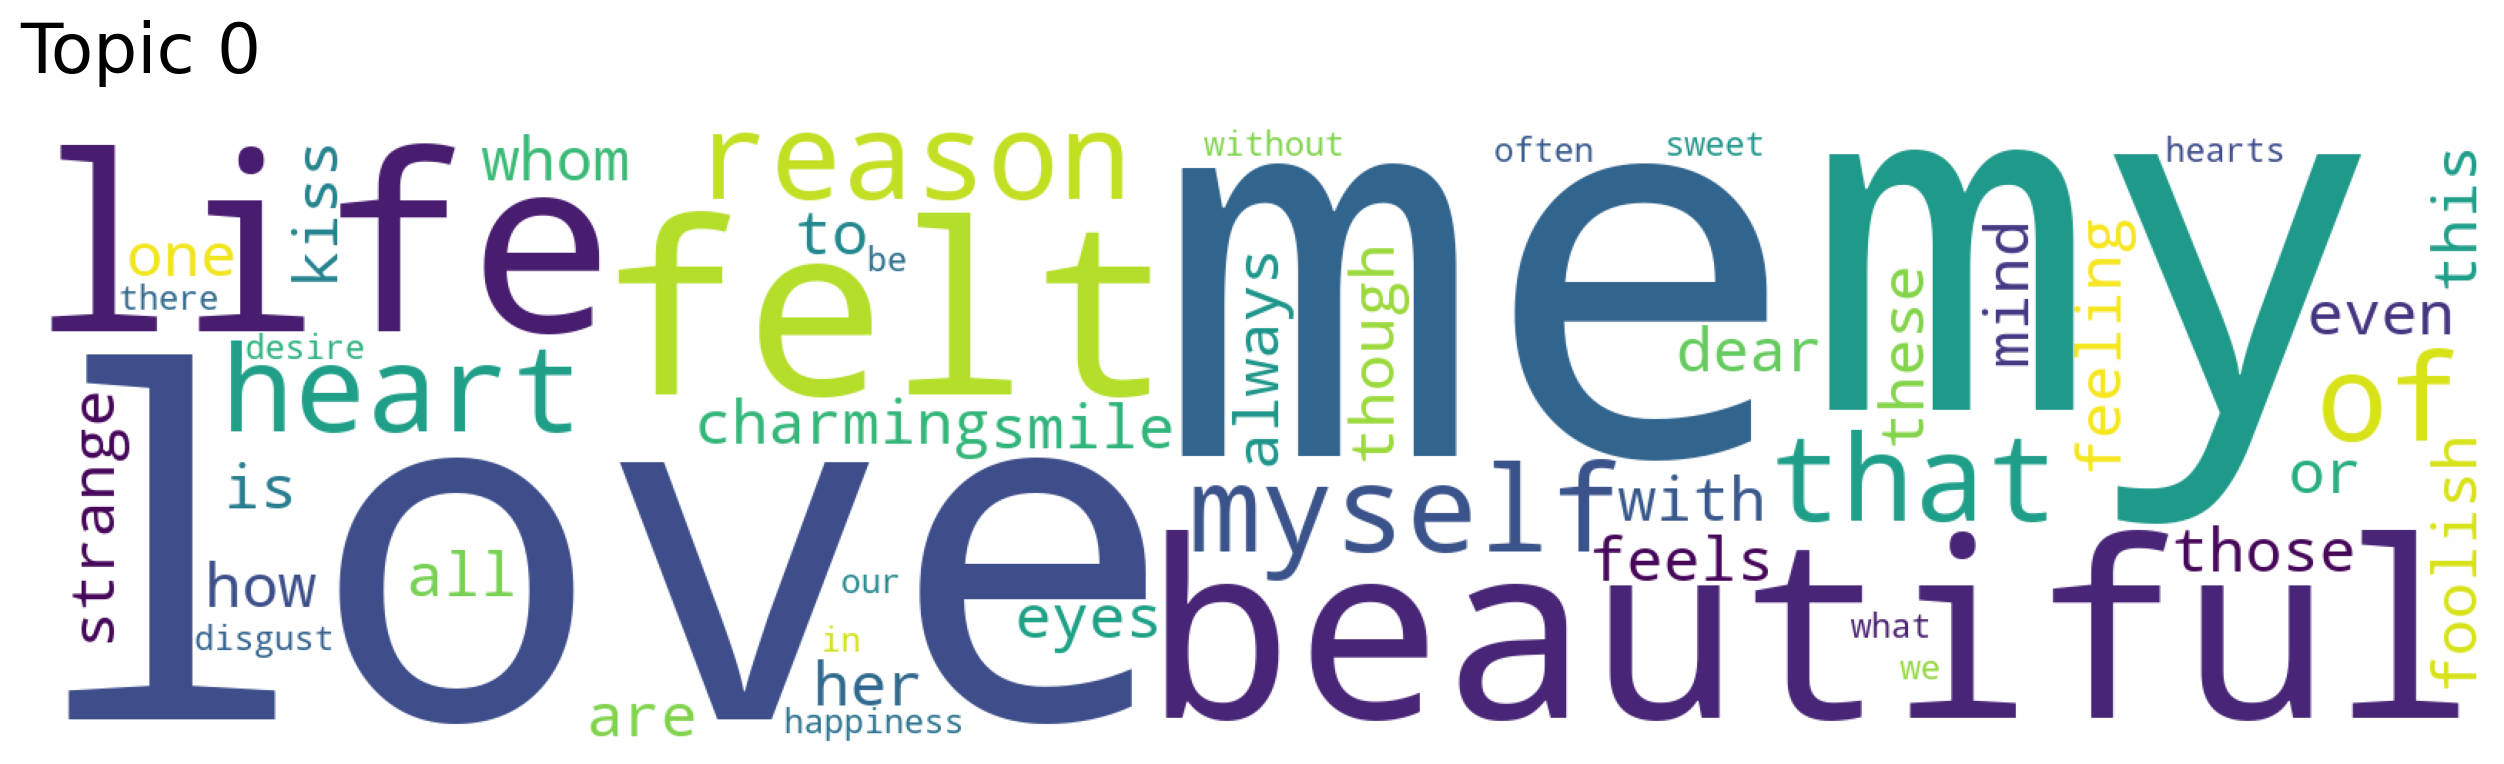

In [8]:
# Get the topics and their document clusters
topic_words, word_scores, topics = top2vec_model.get_topics(num_topics=num_topics) # Specify the number of topics you want

for topic_number in range(num_topics): 
    for words, scores, num in zip(topic_words[topic_number:], word_scores[topic_number:], topics[topic_number:]):
        print(f"Topic {num}")
        for word, score in zip(words, scores):
            print(word, score)

### GENERATE WORD CLOUD

In [ ]:
top2vec_model.generate_topic_wordcloud(0, background_color='white')

### UMAP PLOT

/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


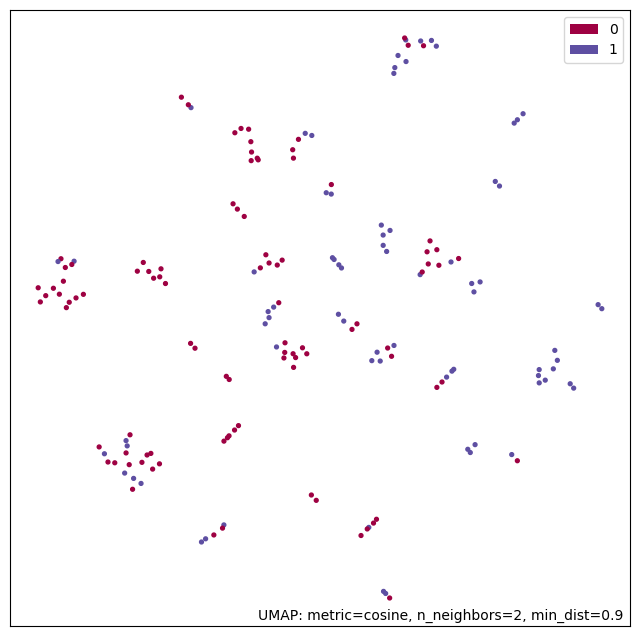

In [13]:
umap_args_model = {
"n_neighbors": 2,
"n_components": 2,
"metric": "cosine",
'min_dist':0.9,
'spread':1,
'random_state': 42
}
umap_model = umap.UMAP(**umap_args_model).fit(top2vec_model.document_vectors)

umap.plot.points(umap_model, labels = top2vec_model.doc_top ) #

plt.show()